<a href="https://colab.research.google.com/github/K0SATIN/Data-analyst-home-task/blob/main/Iris_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%BD%D0%BD%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%81_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,341 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,157 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://secu

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.4.0-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [ ]:
!wget -q https://gitlab.com/K0SATIN/store/-/raw/master/iris.CSV

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [ ]:
import pyspark
from pyspark.sql.functions import lit

In [ ]:
from pyspark.sql.functions import col, asc, desc, when

In [ ]:
df = spark.read.csv('iris.CSV', inferSchema = True, header = True)

In [ ]:
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



In [ ]:
df_1 = df.select(['sepal_length','sepal_width','petal_length','petal_width', 'variety'])
df_1.groupBy('variety').avg('sepal_length','sepal_width','petal_length','petal_width').show()
df_1.groupBy('variety').min('sepal_length','sepal_width','petal_length','petal_width').show()
df_1.groupBy('variety').max('sepal_length','sepal_width','petal_length','petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|    

In [ ]:
psdf1 = df.to_pandas_on_spark()

/content/spark-3.4.0-bin-hadoop3/python/pyspark/sql/dataframe.py:5249: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(
/content/spark-3.4.0-bin-hadoop3/python/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
psdf1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0


<Axes: xlabel='petal_length', ylabel='petal_width'>

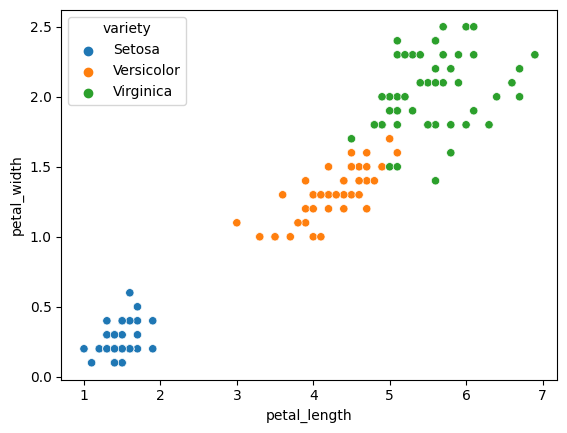

In [ ]:
psdf2 = df.toPandas()
sns.scatterplot(data=psdf2, x="petal_length", y="petal_width", hue="variety")

In [ ]:
df_2 = df.withColumn("IsSetosa", when(col("petal_length") < 2, lit("Yes")).otherwise(lit("No")))
df_2.show(4)

+------------+-----------+------------+-----------+-------+-----------+--------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|IsSetosa|
+------------+-----------+------------+-----------+-------+-----------+--------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|     Yes|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|     Yes|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|     Yes|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|     Yes|
+------------+-----------+------------+-----------+-------+-----------+--------+
only showing top 4 rows



In [ ]:
a = df_2.where((df_2.variety == 'Setosa')&(df_2.IsSetosa == "Yes")).count()
b = df_2.where((df_2.variety == 'Setosa')&(df_2.IsSetosa == "Not")).count()
print("Число успешных предсказаний", a, ", число промахов = ", b)

Число успешных предсказаний 50 , число промахов =  0
